In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path


In [2]:
pitching_path = ("Resource/Pitching.csv")
pitchingpost_path = ("Resource/PitchingPost.csv")
salaries_path = ("mlb_project1/adjusted_salary_output.csv")


In [3]:
pitching_data_df = pd.read_csv(pitching_path)
pitching_data_clean_df = pitching_data_df[['playerID', 'yearID', 'teamID', 'lgID', 'W', 'ERA', 'SO']]
pitching_data_clean_df.head()


,playerID,yearID,teamID,lgID,W,ERA,SO
0,bechtge01,1871,PH1,NaN,1,7.96,1
1,brainas01,1871,WS3,NaN,12,4.50,13
2,fergubo01,1871,NY2,NaN,0,27.00,0
3,fishech01,1871,RC1,NaN,4,4.35,15
4,fleetfr01,1871,NY2,NaN,0,10.00,0


In [4]:

pitching_data_clean_df = pitching_data_clean_df[pitching_data_clean_df['yearID']>=1985]
pitching_data_clean_df

,playerID,yearID,teamID,lgID,W,ERA,SO
24980,aasedo01,1985,BAL,AL,10,3.78,67
24981,abregjo01,1985,CHN,NL,1,6.38,13
24982,ackerji01,1985,TOR,AL,7,3.23,42
24983,agostju01,1985,CHA,AL,4,3.58,39
24984,aguilri01,1985,NYN,NL,10,3.24,74
...,...,...,...,...,...,...,...
44958,zastrro01,2016,CHN,NL,1,1.13,17
44959,zieglbr01,2016,ARI,NL,2,2.82,27
44960,zieglbr01,2016,BOS,AL,2,1.52,31
44961,zimmejo02,2016,DET,AL,9,4.87,66


In [5]:
total_SO_per_team_per_year_df = pitching_data_clean_df.groupby(['yearID', 'teamID',])['SO'].sum().reset_index()
total_SO_per_team_per_year_df  

,yearID,teamID,SO
0,1985,ATL,776
1,1985,BAL,793
2,1985,BOS,913
3,1985,CAL,767
4,1985,CHA,1023
...,...,...,...
913,2016,SLN,1290
914,2016,TBA,1357
915,2016,TEX,1154
916,2016,TOR,1314


In [6]:
total_W_per_team_per_year_df = pitching_data_clean_df.groupby(['yearID', 'teamID'])['W'].sum().reset_index()
total_W_per_team_per_year_df

,yearID,teamID,W
0,1985,ATL,66
1,1985,BAL,83
2,1985,BOS,81
3,1985,CAL,90
4,1985,CHA,85
...,...,...,...
913,2016,SLN,86
914,2016,TBA,68
915,2016,TEX,95
916,2016,TOR,89


In [7]:
avg_ERA_per_team_per_year_df = pitching_data_clean_df.groupby(['yearID', 'teamID'])['ERA'].mean().reset_index()
avg_ERA_per_team_per_year_df

,yearID,teamID,ERA
0,1985,ATL,4.615000
1,1985,BAL,5.148000
2,1985,BOS,6.916471
3,1985,CAL,5.772105
4,1985,CHA,4.872105
...,...,...,...
913,2016,SLN,5.668571
914,2016,TBA,4.069200
915,2016,TEX,6.414516
916,2016,TOR,5.810000


In [8]:
merge_pitching_df = pd.merge(total_W_per_team_per_year_df, total_SO_per_team_per_year_df, on=['yearID', 'teamID'])
merge_pitching_df = pd.merge(merge_pitching_df, avg_ERA_per_team_per_year_df, on=['yearID', 'teamID'])
merge_pitching_df

,yearID,teamID,W,SO,ERA
0,1985,ATL,66,776,4.615000
1,1985,BAL,83,793,5.148000
2,1985,BOS,81,913,6.916471
3,1985,CAL,90,767,5.772105
4,1985,CHA,85,1023,4.872105
...,...,...,...,...,...
913,2016,SLN,86,1290,5.668571
914,2016,TBA,68,1357,4.069200
915,2016,TEX,95,1154,6.414516
916,2016,TOR,89,1314,5.810000


In [9]:
merge_pitching_pre_MB_df = merge_pitching_df[(merge_pitching_df['yearID']>=1985)&(merge_pitching_df['yearID']<=2001)]
merge_pitching_pre_MB_df


,yearID,teamID,W,SO,ERA
0,1985,ATL,66,776,4.615000
1,1985,BAL,83,793,5.148000
2,1985,BOS,81,913,6.916471
3,1985,CAL,90,767,5.772105
4,1985,CHA,85,1023,4.872105
...,...,...,...,...,...
463,2001,SFN,90,1080,5.067222
464,2001,SLN,93,1083,5.929048
465,2001,TBA,62,1030,5.448750
466,2001,TEX,73,951,6.602000


In [10]:
merge_pitching_post_MB_df = merge_pitching_df[merge_pitching_df['yearID']>=2002]
merge_pitching_post_MB_df

,yearID,teamID,W,SO,ERA
468,2002,ANA,99,999,3.425556
469,2002,ARI,98,1303,5.437000
470,2002,ATL,101,1058,5.034000
471,2002,BAL,67,967,5.487500
472,2002,BOS,93,1157,4.437778
...,...,...,...,...,...
913,2016,SLN,86,1290,5.668571
914,2016,TBA,68,1357,4.069200
915,2016,TEX,95,1154,6.414516
916,2016,TOR,89,1314,5.810000


In [11]:
mlb_salaries_df = pd.read_csv(salaries_path)

merge_pitching_salaries = pd.merge(mlb_salaries_df, merge_pitching_df, left_index=True, right_index=True)
merge_pitching_salaries



,yearID_x,teamID_x,salary,adjusted_salary,yearID_y,teamID_y,W,SO,ERA
0,1985,ATL,14807000,34258061,1985,ATL,66,776,4.615000
1,1985,BAL,11560712,26747321,1985,BAL,83,793,5.148000
2,1985,BOS,10897560,25213026,1985,BOS,81,913,6.916471
3,1985,CAL,14427894,33380947,1985,CAL,90,767,5.772105
4,1985,CHA,9846178,22780507,1985,CHA,85,1023,4.872105
...,...,...,...,...,...,...,...,...,...
913,2016,STL,143053500,143053500,2016,SLN,86,1290,5.668571
914,2016,TBR,57097310,57097310,2016,TBA,68,1357,4.069200
915,2016,TEX,176038723,176038723,2016,TEX,95,1154,6.414516
916,2016,TOR,138701700,138701700,2016,TOR,89,1314,5.810000


In [12]:
new_merge_pitching_salaries = merge_pitching_salaries[['yearID_x','teamID_x','salary', 'adjusted_salary','W', 'ERA', 'SO']].copy()
new_merge_pitching_salaries.rename(columns={'yearID_x':'YearID', 'teamID_x':'TeamID', 'salary':'Salary', 'adjusted_salary':'Adjusted Salary', 'W':'Wins', 'SO':'Strikeouts'}, inplace=True)
new_merge_pitching_salaries.to_csv("Output/New Merge Pitching.cvs", index=False, header=True)
new_merge_pitching_salaries

,YearID,TeamID,Salary,Adjusted Salary,Wins,ERA,Strikeouts
0,1985,ATL,14807000,34258061,66,4.615000,776
1,1985,BAL,11560712,26747321,83,5.148000,793
2,1985,BOS,10897560,25213026,81,6.916471,913
3,1985,CAL,14427894,33380947,90,5.772105,767
4,1985,CHA,9846178,22780507,85,4.872105,1023
...,...,...,...,...,...,...,...
913,2016,STL,143053500,143053500,86,5.668571,1290
914,2016,TBR,57097310,57097310,68,4.069200,1357
915,2016,TEX,176038723,176038723,95,6.414516,1154
916,2016,TOR,138701700,138701700,89,5.810000,1314


The r-squared is: 0.07984770539728975


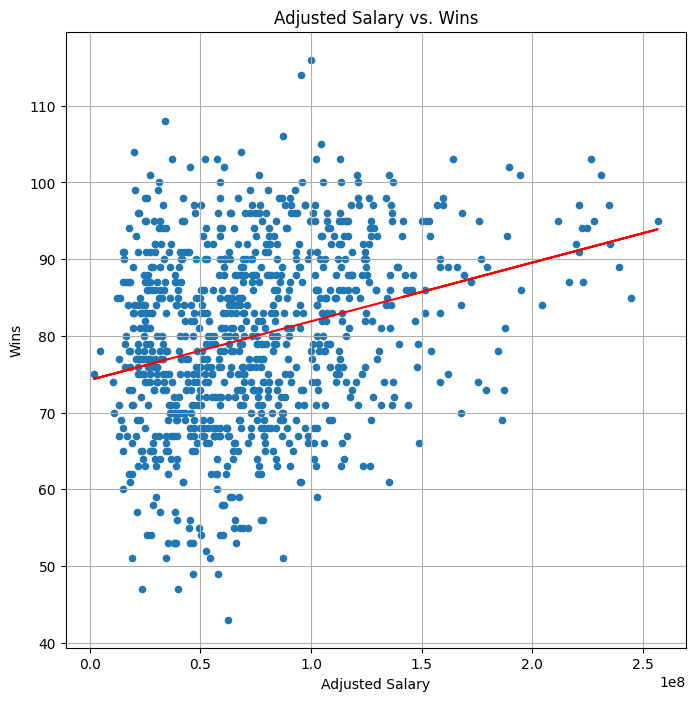

In [13]:
new_merge_pitching_salaries.plot(kind="scatter", x="Adjusted Salary", y="Wins", grid=True, figsize=(8,8),
              title="Adjusted Salary vs. Wins")

slope, intercept, r_value, p_value, std_err = linregress(new_merge_pitching_salaries['Adjusted Salary'], new_merge_pitching_salaries['Wins'])
regression_line = slope * new_merge_pitching_salaries['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(new_merge_pitching_salaries['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. Wins.png")
plt.show()


The r-squared is: 0.00100963997973586


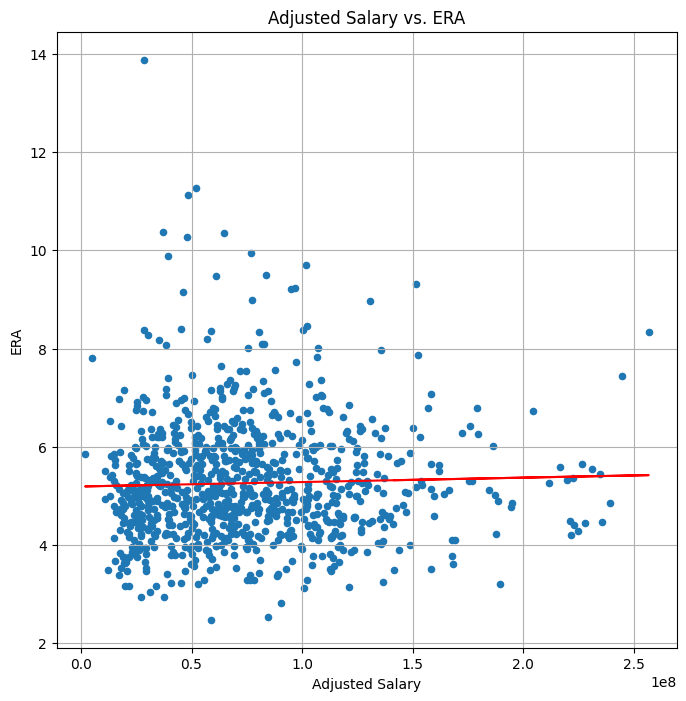

In [14]:
new_merge_pitching_salaries.plot(kind="scatter", x="Adjusted Salary", y="ERA", grid=True, figsize=(8,8),
              title="Adjusted Salary vs. ERA")
slope, intercept, r_value, p_value, std_err = linregress(new_merge_pitching_salaries['Adjusted Salary'], new_merge_pitching_salaries['ERA'])
regression_line = slope * new_merge_pitching_salaries['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(new_merge_pitching_salaries['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. ERA.png")
plt.show()

The r-squared is: 0.31973408601293063


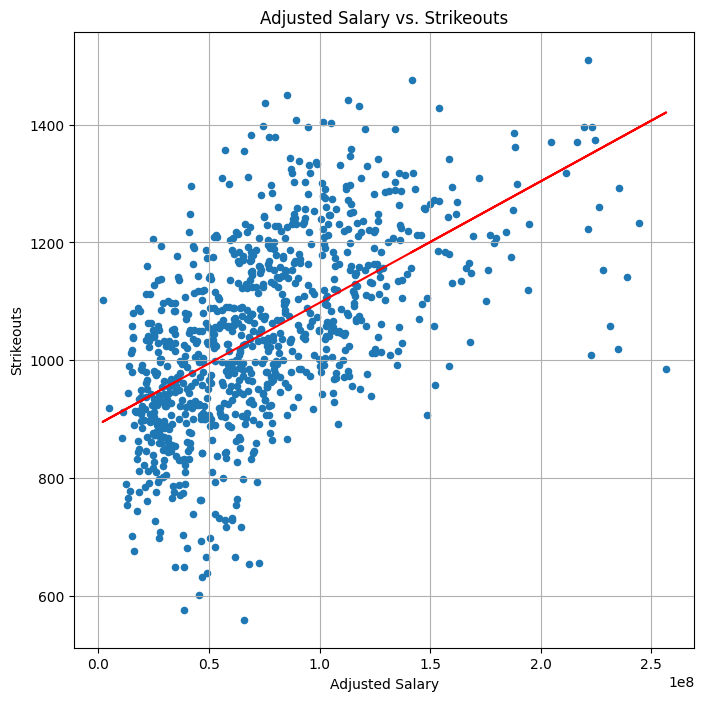

In [15]:
new_merge_pitching_salaries.plot(kind="scatter", x="Adjusted Salary", y="Strikeouts", grid=True, figsize=(8,8),
              title="Adjusted Salary vs. Strikeouts")
slope, intercept, r_value, p_value, std_err = linregress(new_merge_pitching_salaries['Adjusted Salary'], new_merge_pitching_salaries['Strikeouts'])
regression_line = slope * new_merge_pitching_salaries['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(new_merge_pitching_salaries['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. Strikeouts.png")
plt.show()

In [16]:
df_1985_to_2001 = new_merge_pitching_salaries[(new_merge_pitching_salaries['YearID'] >=1985) & (new_merge_pitching_salaries['YearID']<=2001)]
df_1985_to_2001

,YearID,TeamID,Salary,Adjusted Salary,Wins,ERA,Strikeouts
0,1985,ATL,14807000,34258061,66,4.615000,776
1,1985,BAL,11560712,26747321,83,5.148000,793
2,1985,BOS,10897560,25213026,81,6.916471,913
3,1985,CAL,14427894,33380947,90,5.772105,767
4,1985,CHA,9846178,22780507,85,4.872105,1023
...,...,...,...,...,...,...,...
463,2001,SFN,63280167,84573095,90,5.067222,1080
464,2001,SLN,78538333,104965429,93,5.929048,1083
465,2001,TBA,56980000,76153006,62,5.448750,1030
466,2001,TEX,88633500,118457485,73,6.602000,951


In [17]:
df_2002_to_2016 = new_merge_pitching_salaries[(new_merge_pitching_salaries['YearID'])>=2002]
df_2002_to_2016

,YearID,TeamID,Salary,Adjusted Salary,Wins,ERA,Strikeouts
468,2002,ANA,61721667,80399786,99,3.425556,999
469,2002,ARI,102819999,133935235,98,5.437000,1303
470,2002,ATL,92870367,120974660,101,5.034000,1058
471,2002,BAL,60493487,78799936,67,5.487500,967
472,2002,BOS,108366060,141159636,93,4.437778,1157
...,...,...,...,...,...,...,...
913,2016,STL,143053500,143053500,86,5.668571,1290
914,2016,TBR,57097310,57097310,68,4.069200,1357
915,2016,TEX,176038723,176038723,95,6.414516,1154
916,2016,TOR,138701700,138701700,89,5.810000,1314


The r-squared is: 0.07984770539728975


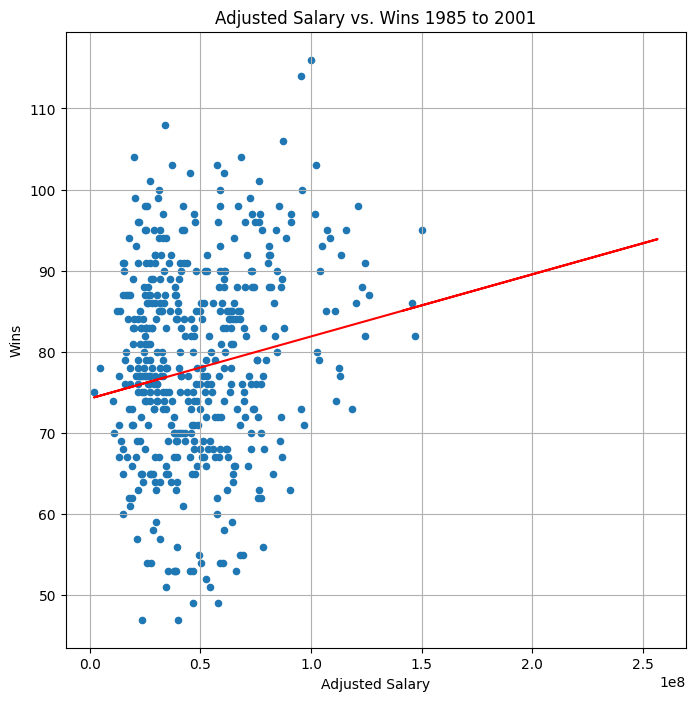

The r-squared is: 0.07984770539728975


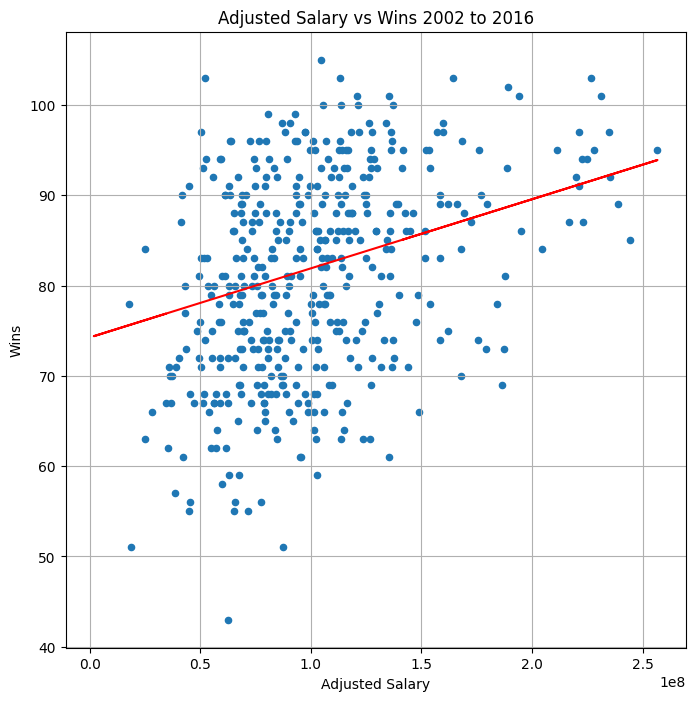

In [18]:
df_1985_to_2001.plot(kind="scatter", x="Adjusted Salary", y="Wins", grid=True, figsize=(8,8),
              title="Adjusted Salary vs. Wins 1985 to 2001")

slope, intercept, r_value, p_value, std_err = linregress(new_merge_pitching_salaries['Adjusted Salary'], new_merge_pitching_salaries['Wins'])
regression_line = slope * new_merge_pitching_salaries['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(new_merge_pitching_salaries['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. Wins 1985 to 2001.png")
plt.show()

df_2002_to_2016.plot(kind="scatter", x="Adjusted Salary", y="Wins", grid=True, figsize=(8,8),
                     title="Adjusted Salary vs Wins 2002 to 2016")

slope, intercept, r_value, p_value, std_err = linregress(new_merge_pitching_salaries['Adjusted Salary'], new_merge_pitching_salaries['Wins'])
regression_line = slope * new_merge_pitching_salaries['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(new_merge_pitching_salaries['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. Wins 2002 to 2016.png")
plt.show()


The r-squared is: 0.04427337311668163


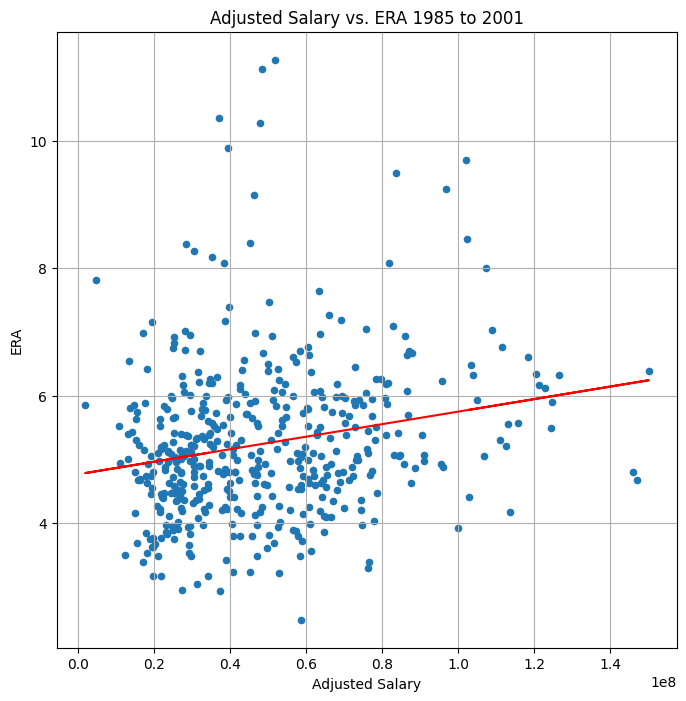

The r-squared is: 0.006700503390194811


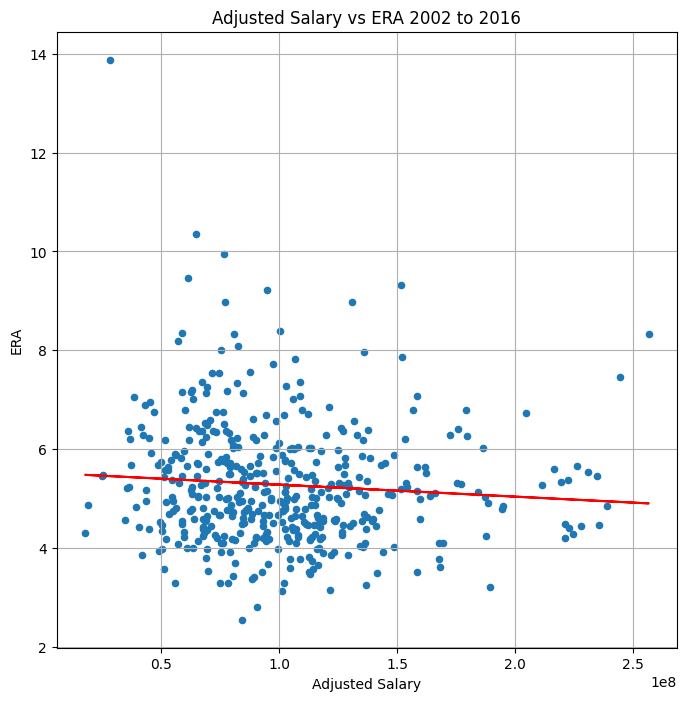

In [19]:
df_1985_to_2001.plot(kind="scatter", x="Adjusted Salary", y="ERA", grid=True, figsize=(8,8),
              title="Adjusted Salary vs. ERA 1985 to 2001")

slope, intercept, r_value, p_value, std_err = linregress(df_1985_to_2001['Adjusted Salary'], df_1985_to_2001['ERA'])
regression_line = slope * df_1985_to_2001['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_1985_to_2001['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. ERA 1985 to 2001.png")
plt.show()

df_2002_to_2016.plot(kind="scatter", x="Adjusted Salary", y="ERA", grid=True, figsize=(8,8),
                     title="Adjusted Salary vs ERA 2002 to 2016")

slope, intercept, r_value, p_value, std_err = linregress(df_2002_to_2016['Adjusted Salary'], df_2002_to_2016['ERA'])
regression_line = slope * df_2002_to_2016['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_2002_to_2016['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. ERA 2002 to 2016.png")
plt.show()

The r-squared is: 0.16403381263047678


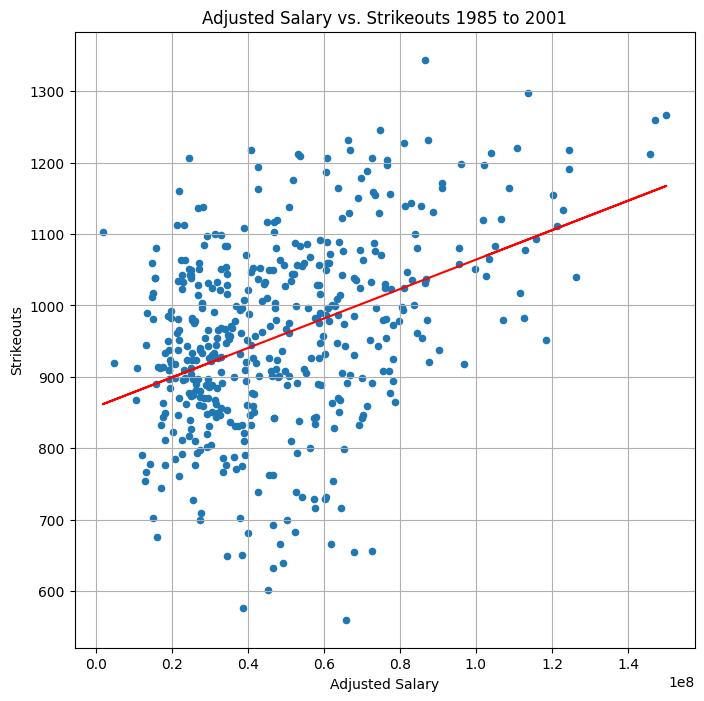

The r-squared is: 0.11034859493281382


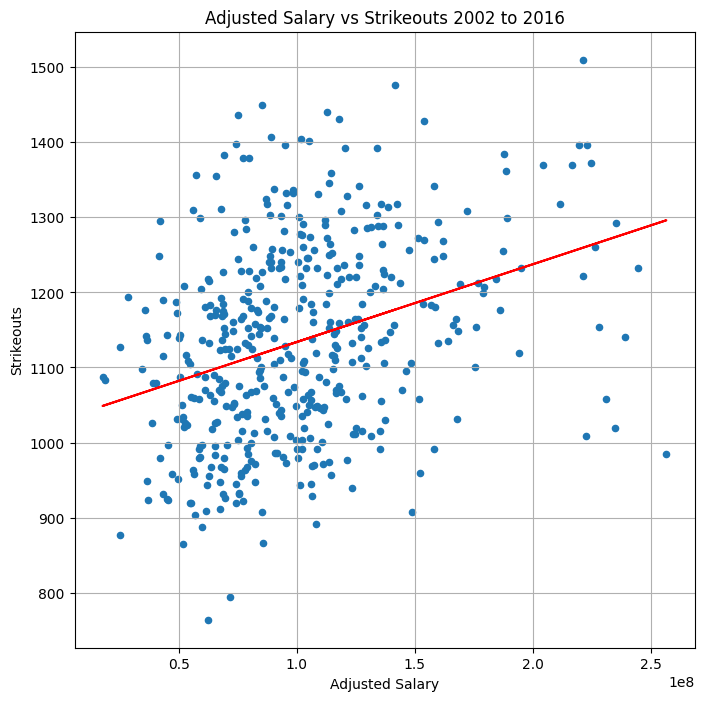

In [20]:
df_1985_to_2001.plot(kind="scatter", x="Adjusted Salary", y="Strikeouts", grid=True, figsize=(8,8),
              title="Adjusted Salary vs. Strikeouts 1985 to 2001")

slope, intercept, r_value, p_value, std_err = linregress(df_1985_to_2001['Adjusted Salary'], df_1985_to_2001['Strikeouts'])
regression_line = slope * df_1985_to_2001['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_1985_to_2001['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. Strikeouts 1985 to 2001.png")
plt.show()

df_2002_to_2016.plot(kind="scatter", x="Adjusted Salary", y="Strikeouts", grid=True, figsize=(8,8),
                     title="Adjusted Salary vs Strikeouts 2002 to 2016")

slope, intercept, r_value, p_value, std_err = linregress(df_2002_to_2016['Adjusted Salary'], df_2002_to_2016['Strikeouts'])
regression_line = slope * df_2002_to_2016['Adjusted Salary'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_2002_to_2016['Adjusted Salary'],regression_line, "r-")
plt.savefig("Output/Adjusted Salary vs. Strikeouts 2002 to 2016.png")
plt.show()

The r-squared is: 0.0703386300601096


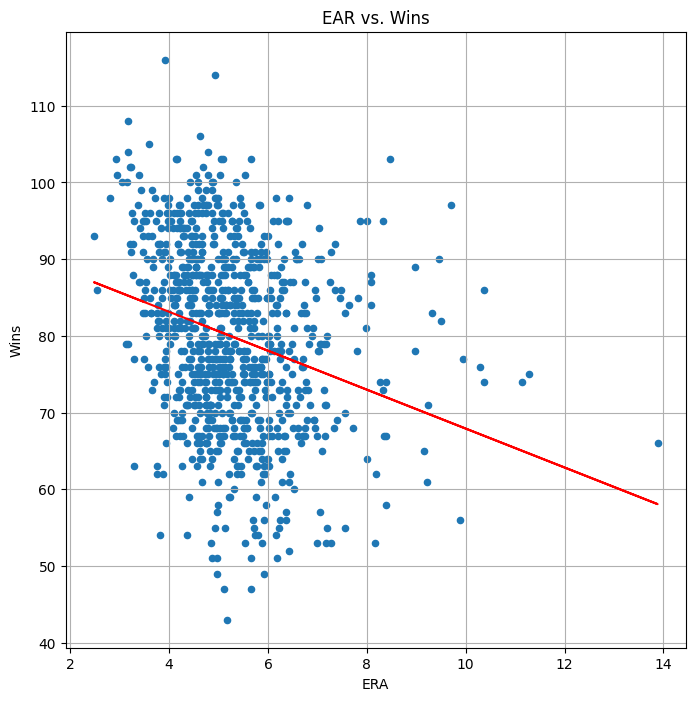

In [21]:
new_merge_pitching_salaries.plot(kind="scatter", x="ERA", y="Wins", grid=True, figsize=(8,8),
              title="EAR vs. Wins")
slope, intercept, r_value, p_value, std_err = linregress(new_merge_pitching_salaries['ERA'], new_merge_pitching_salaries['Wins'])
regression_line = slope * new_merge_pitching_salaries['ERA'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(new_merge_pitching_salaries['ERA'],regression_line, "r-")
plt.savefig("Output/ERA vs. Wins.png")
plt.show()

The r-squared is: 0.062455233928107944


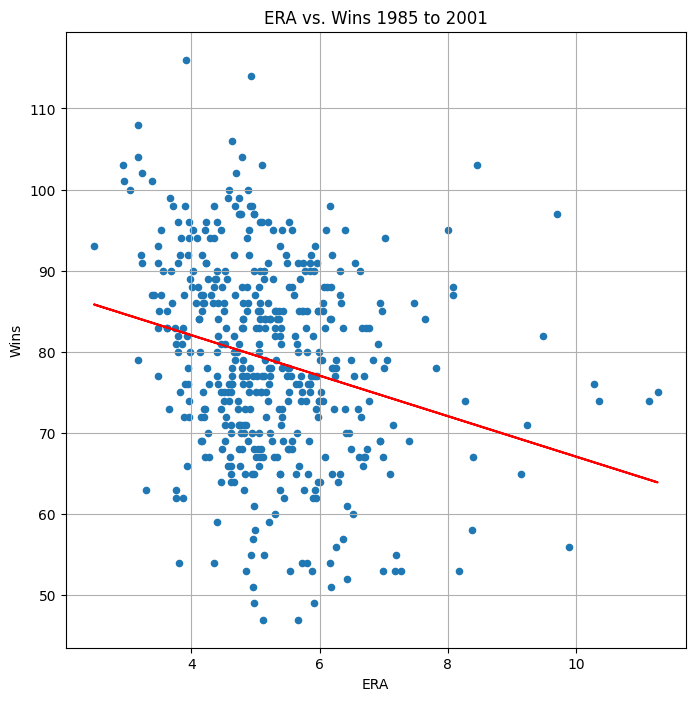

The r-squared is: 0.0823223562828353


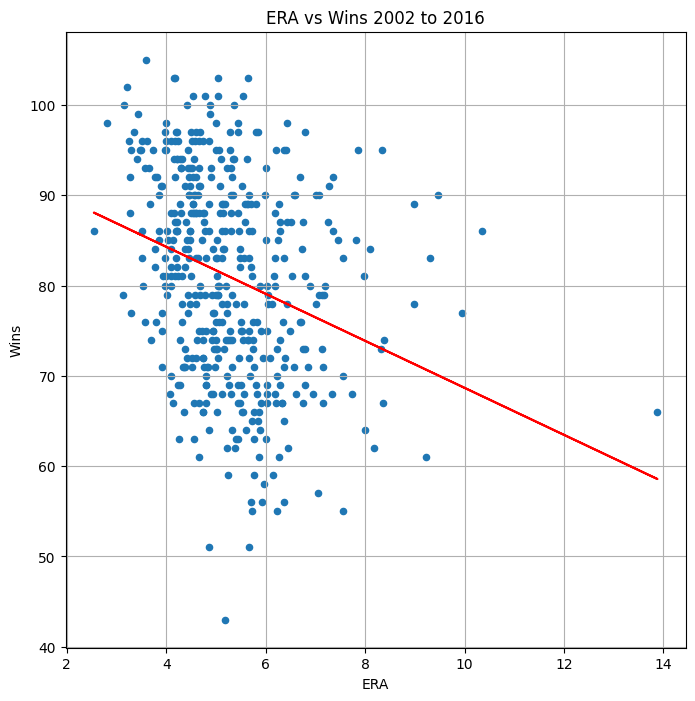

In [22]:
df_1985_to_2001.plot(kind="scatter", x="ERA", y="Wins", grid=True, figsize=(8,8),
              title="ERA vs. Wins 1985 to 2001")

slope, intercept, r_value, p_value, std_err = linregress(df_1985_to_2001['ERA'], df_1985_to_2001['Wins'])
regression_line = slope * df_1985_to_2001['ERA'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_1985_to_2001['ERA'],regression_line, "r-")
plt.savefig("Output/ERA vs. Wins 1985 to 2001.png")
plt.show()

df_2002_to_2016.plot(kind="scatter", x="ERA", y="Wins", grid=True, figsize=(8,8),
                     title="ERA vs Wins 2002 to 2016")

slope, intercept, r_value, p_value, std_err = linregress(df_2002_to_2016['ERA'], df_2002_to_2016['Wins'])
regression_line = slope * df_2002_to_2016['ERA'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_2002_to_2016['ERA'],regression_line, "r-")
plt.savefig("Output/ERA vs. Wins 2002 to 2016.png")
plt.show()

The r-squared is: 0.14239100019929857


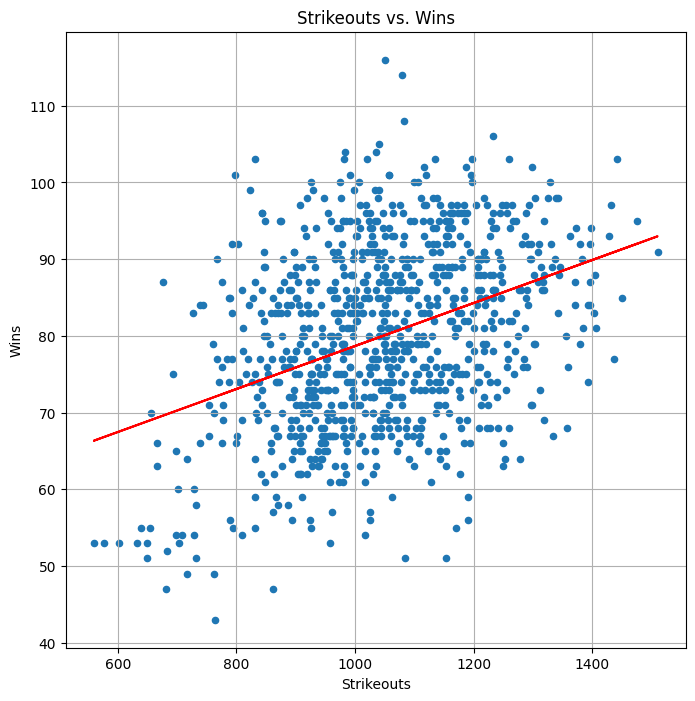

In [23]:
new_merge_pitching_salaries.plot(kind="scatter", x="Strikeouts", y="Wins", grid=True, figsize=(8,8),
              title="Strikeouts vs. Wins")
slope, intercept, r_value, p_value, std_err = linregress(new_merge_pitching_salaries['Strikeouts'], new_merge_pitching_salaries['Wins'])
regression_line = slope * new_merge_pitching_salaries['Strikeouts'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(new_merge_pitching_salaries['Strikeouts'],regression_line, "r-")
plt.savefig("Output/Strikeouts vs Wins.png")
plt.show()

The r-squared is: 0.22161333961200405


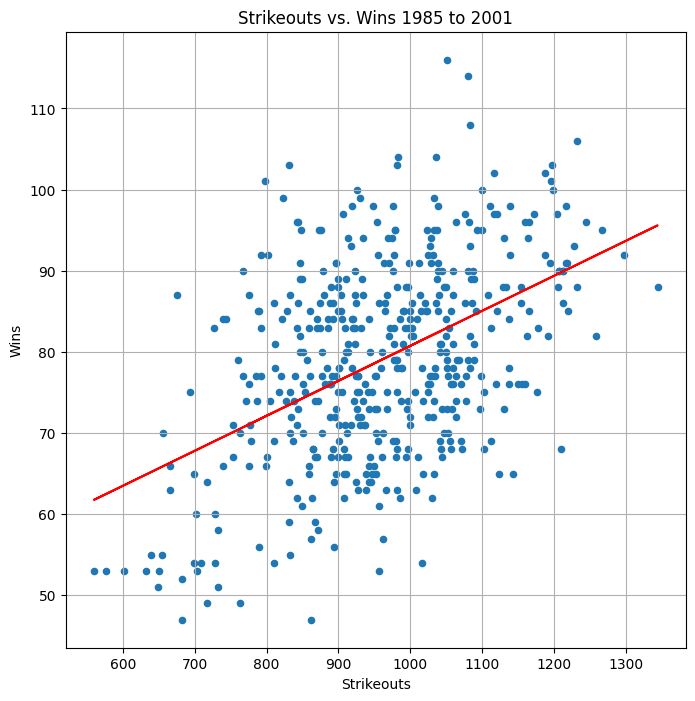

The r-squared is: 0.10035944306024393


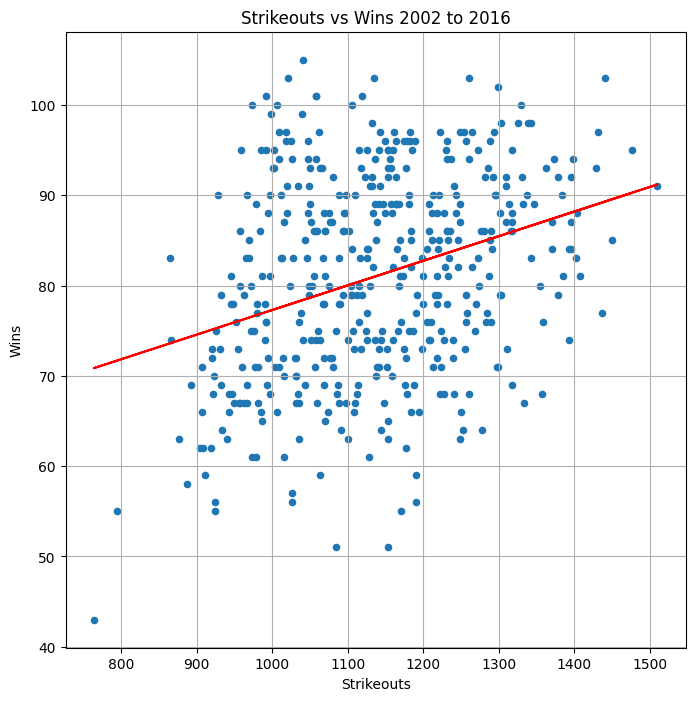

In [24]:
df_1985_to_2001.plot(kind="scatter", x="Strikeouts", y="Wins", grid=True, figsize=(8,8),
              title="Strikeouts vs. Wins 1985 to 2001")

slope, intercept, r_value, p_value, std_err = linregress(df_1985_to_2001['Strikeouts'], df_1985_to_2001['Wins'])
regression_line = slope * df_1985_to_2001['Strikeouts'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_1985_to_2001['Strikeouts'],regression_line, "r-")
plt.savefig("Output/Strikeouts vs. Wins 1985 to 2001.png")
plt.show()

df_2002_to_2016.plot(kind="scatter", x="Strikeouts", y="Wins", grid=True, figsize=(8,8),
                     title="Strikeouts vs Wins 2002 to 2016")

slope, intercept, r_value, p_value, std_err = linregress(df_2002_to_2016['Strikeouts'], df_2002_to_2016['Wins'])
regression_line = slope * df_2002_to_2016['Strikeouts'] + intercept
print(f"The r-squared is: {r_value**2}")
plt.plot(df_2002_to_2016['Strikeouts'],regression_line, "r-")
plt.savefig("Output/Strikeouts vs. Wins 2002 to 2016.png")
plt.show()